In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
driver = webdriver.Chrome("/Users/je/pandasProject/chromedriver")
# chromedriver는 주기적으로 업데이트 되니 최신 상태를 확인할 것

/var/folders/c1/rsntflqd7vx6774s642zmw6h0000gn/T/ipykernel_8172/3927975119.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("/Users/je/pandasProject/chromedriver")


In [2]:
import time
#인스타그램 접속하기
driver.get('https://www.instagram.com')
time.sleep(2)

In [3]:
# 이메일 입력
email = 'hjyu@idaegu.com'
input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0] # input이 비밀번호 입력 칸도 있으니까 [0]을 입력해줘서 아이디 입력 칸이라는 것을 명시해준다.
input_id.clear()
input_id.send_keys(email)

# 비밀번호 입력
password = 'now9841'
input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]
input_pw.clear()
input_pw.send_keys(password)

# 제출
input_pw.submit()
time.sleep(3)

/var/folders/c1/rsntflqd7vx6774s642zmw6h0000gn/T/ipykernel_8172/2598180751.py:3: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0] # input이 비밀번호 입력 칸도 있으니까 [0]을 입력해줘서 아이디 입력 칸이라는 것을 명시해준다.
/var/folders/c1/rsntflqd7vx6774s642zmw6h0000gn/T/ipykernel_8172/2598180751.py:9: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]


In [4]:
# 쿼리: '대구 카페'를 검색하면 url 끝에 '/?q=대구%20카페'가 생긴다.

# 검색 결과 url 만들기
def insta_searching(word):
    url = 'https://www.instagram.com/explore/tags/' + word
    return url

In [5]:
word = '제주도맛집'
url = insta_searching(word)
driver.get(url)

In [6]:
# 첫 게시물 클릭하기
def select_first(driver):
    first = driver.find_element_by_css_selector("div._aagw")
    first.click()
    time.sleep(3) # In [ ]에 *가 오래 돌아가는 경우에는 time.sleep( ) 코드를 쓴다.
    
select_first(driver)

/var/folders/c1/rsntflqd7vx6774s642zmw6h0000gn/T/ipykernel_8172/2305750252.py:3: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  first = driver.find_element_by_css_selector("div._aagw")


In [7]:
# 게시글 내용 긁어오기
import re # 문자열을 다루는 파이썬의 라이브러리
from bs4 import BeautifulSoup
import unicodedata

def get_content(driver): # get_content()라는 함수를 만들 것인데, 그 함수는 driver를 쓴다.
    # 1. 현재 페이지 html 정보 가져오기
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    # 2. 본문 내용 가져오기
    try:
        content = soup.select('div._a9zs > span')[0].text
        content = unicodedata.normalize('NFC', content)
    except:
        content = ' ' # 안 될 때는 그냥 비워둬라
    # 3. 해시태그 가져오기
    tags = re.findall(r'#[^\s#,\\]+', content)
    # 4. 날짜 정보 가져오기
    date = soup.select('time._aaqe')[0]['datetime'][:10] # 10까지면 일자까지 가져옴
    # 5. 위치 정보 가져오기
    try:
        place = soup.select('div._aacl._aacn._aacu._aacy._aada._aade')[0].text
        place = unicodedata.normalize('NFC', place)
    except:
        place = ' '
    # 수집한 정보 저장하기
    data = [content, date, place, tags]
    return data

get_content(driver)

['제주도에서 찾은 바베큐 끝판왕입니다. 대형 바베큐장에서 장작훈연을 하는데 이게 서울같은 도심에서는 어려운 방법이라고 합니다. 바다를 보며 제주에만 있는 바베큐를 먹을 수 있는 곳. 제주에 애월읍에 위치한 후프바베큐입니다. 건물 외부부터 내부인테리어까지 신경을 쓴 느낌이 많이 느껴집니다. 관광객분들에게 정말 추천하고 싶습니다. 매장 어디에서 사진찍어도 잘 나오니 꼭 방문하셔서 사진 찍으시길. 매장에 있는 메뉴 대부분을 먹어볼 수 있는 후프플래터를 가장 추천합니다. 비프립,스페어립,폴드포크,새우,전복등 다양한 바베큐와 해산물 그리고 치미추리,보말소스등 소스도 다양하게 준비됩니다. 소스까지 다양하게 나오니 고기와 다양하게 조합해서 먹기 좋았습니다. 확실히 훈연을 오랜시간 해서 그런지 평소에 먹던 바베큐 보다 훨씬 훈연향이 많이 나고 고기가 부드러웠습니다. 소스도 다양해서 각자 취향껏 맛있게 먹을 수 있습니다. 번과 함께 먹어도 맛있고 사이드를 시켜서 고기와 함께 먹어도 훌륭합니다.여행 중 애월 쪽 방문하신다면 꼭 가보시는걸 추천합니다. 위에서 말했지만 매장 어디서든 사진 찍어도 예쁘게 잘나오기도 하고 오션뷰에 오직 여기에서만 먹을 수 있는 바베큐이니 다들 꼭 방문해보시길!상호명 : 후프바베큐주소 : 제주 제주시 애월읍 애월북서길69#제주도맛집#제주맛집#애월맛집#바베큐맛집#제주찐맛집#제주신상맛집#제주도게스트하우스#제주도여행#제주여행#먹스타그램#맛스타그램#좋아요반사#후프바베큐#맛쨍이_제주도',
 '2022-07-31',
 '제주 애월읍',
 ['#제주도맛집',
  '#제주맛집',
  '#애월맛집',
  '#바베큐맛집',
  '#제주찐맛집',
  '#제주신상맛집',
  '#제주도게스트하우스',
  '#제주도여행',
  '#제주여행',
  '#먹스타그램',
  '#맛스타그램',
  '#좋아요반사',
  '#후프바베큐',
  '#맛쨍이_제주도']]

In [8]:
def move_next(drive):
    xpath="//*[name()='svg'][@aria-label='다음']" # 개발자들이 만들어 놓은 소스(고유명사). html css에 쓰이는 태그를 찾는 법 중 하나
    right = driver.find_element_by_xpath(xpath)
    right.click()
    time.sleep(3)
move_next(driver)

/var/folders/c1/rsntflqd7vx6774s642zmw6h0000gn/T/ipykernel_8172/3145889736.py:3: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  right = driver.find_element_by_xpath(xpath)


In [9]:
for x in range(5):
    move_next(driver)

/var/folders/c1/rsntflqd7vx6774s642zmw6h0000gn/T/ipykernel_8052/1471863517.py:3: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  right = driver.find_element_by_xpath(xpath)


In [ ]:
# 5개 가져와보기 연습

for x in range(5):
    def get_content(driver): # get_content()라는 함수를 만들 것인데, 그 함수는 driver를 쓴다.
        # 1. 현재 페이지 html 정보 가져오기
        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        # 2. 본문 내용 가져오기
        try:
            content = soup.select('div._a9zs > span')[0].text
            content = unicodedata.normalize('NFC', content)
        except:
            content = ' ' # 안 될 때는 그냥 비워둬라
        # 3. 해시태그 가져오기
        tags = re.findall(r'#[^\s#,\\]+', content)
        # 4. 날짜 정보 가져오기
        date = soup.select('time._aaqe')[0]['datetime'][:10] # 10까지면 일자까지 가져옴
        # 5. 위치 정보 가져오기
        try:
            place = soup.select('div._aacl._aacn._aacu._aacy._aada._aade')[0].text
            place = unicodedata.normalize('NFC', place)
        except:
            place = ' '
        # 수집한 정보 저장하기
        data = [content, date, place, tags]
        return data
    move_next(driver)

get_content(driver)

# 실패... 마지막 하나만 뜨게 됐다.

In [13]:
# 선생님과 함께 실전

# 인스타그램 검색페이지 URL 만들기
word = "제주도맛집"
url = insta_searching(word)

# 검색 페이지 접속하기
driver.get(url)
time.sleep(8) # select_first(driver) 오류가 뜨면 time.sleep() 속 숫자를 더 올려보는 것도 한 방법
              # 처음에는 5를 입력했을 때 "div._aagw"가 5초 안에 로딩이 안 돼 오류가 뜬 것
              # 8로 설정해 로딩할 수 있는 시간을 더 주면 해결

# 첫 번째 게시글
select_first(driver)

# 결괏값 정리할 변수 만들기
results = [ ] # 한 번 돌릴 때 넣을 리스트 형태의 박스를 만들어주고

# 여러 게시물 수집하기
target = 50 # 크롤링할 게시글 수
for i in range(target):
    # 게시물 수집에 오류 발생 시 2초 대기 후 다음 게시물로 넘어가게 try
    # 2초 대기하지 않으면 인스타그램 본사에서 IP를 막을 수도...
    try:
        data = get_content(driver)
        results.append(data) # .append를 해야 [ ] 안에 데이터가 차곡차곡 쌓임
        move_next(driver)
    except:
        time.sleep(2)
        move_next(driver)

print(results[:2])

/var/folders/c1/rsntflqd7vx6774s642zmw6h0000gn/T/ipykernel_8172/2305750252.py:3: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  first = driver.find_element_by_css_selector("div._aagw")
/var/folders/c1/rsntflqd7vx6774s642zmw6h0000gn/T/ipykernel_8172/3145889736.py:3: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  right = driver.find_element_by_xpath(xpath)


[['제주도에서 찾은 바베큐 끝판왕입니다. 대형 바베큐장에서 장작훈연을 하는데 이게 서울같은 도심에서는 어려운 방법이라고 합니다. 바다를 보며 제주에만 있는 바베큐를 먹을 수 있는 곳. 제주에 애월읍에 위치한 후프바베큐입니다. 건물 외부부터 내부인테리어까지 신경을 쓴 느낌이 많이 느껴집니다. 관광객분들에게 정말 추천하고 싶습니다. 매장 어디에서 사진찍어도 잘 나오니 꼭 방문하셔서 사진 찍으시길. 매장에 있는 메뉴 대부분을 먹어볼 수 있는 후프플래터를 가장 추천합니다. 비프립,스페어립,폴드포크,새우,전복등 다양한 바베큐와 해산물 그리고 치미추리,보말소스등 소스도 다양하게 준비됩니다. 소스까지 다양하게 나오니 고기와 다양하게 조합해서 먹기 좋았습니다. 확실히 훈연을 오랜시간 해서 그런지 평소에 먹던 바베큐 보다 훨씬 훈연향이 많이 나고 고기가 부드러웠습니다. 소스도 다양해서 각자 취향껏 맛있게 먹을 수 있습니다. 번과 함께 먹어도 맛있고 사이드를 시켜서 고기와 함께 먹어도 훌륭합니다.여행 중 애월 쪽 방문하신다면 꼭 가보시는걸 추천합니다. 위에서 말했지만 매장 어디서든 사진 찍어도 예쁘게 잘나오기도 하고 오션뷰에 오직 여기에서만 먹을 수 있는 바베큐이니 다들 꼭 방문해보시길!상호명 : 후프바베큐주소 : 제주 제주시 애월읍 애월북서길69#제주도맛집#제주맛집#애월맛집#바베큐맛집#제주찐맛집#제주신상맛집#제주도게스트하우스#제주도여행#제주여행#먹스타그램#맛스타그램#좋아요반사#후프바베큐#맛쨍이_제주도', '2022-07-31', '제주 애월읍', ['#제주도맛집', '#제주맛집', '#애월맛집', '#바베큐맛집', '#제주찐맛집', '#제주신상맛집', '#제주도게스트하우스', '#제주도여행', '#제주여행', '#먹스타그램', '#맛스타그램', '#좋아요반사', '#후프바베큐', '#맛쨍이_제주도']], ['진심으로 추천해주고 싶은숙성흑돼지 전문 "흑돈가"안먹어본 사람은 있어도한번만 먹어본 사람은 없을 정도로도민분들의 사랑을 오랫동안 받아온제주도지사인증 제주흑돼지 1호점!대

In [14]:
import pandas as pd

results_df = pd.DataFrame(results)
results_df.columns = ['content', 'date', 'place', 'tags']
results_df.to_excel('./files/1_crawling_jejudoMatJip.xlsx')

In [15]:
# 인스타그램 검색페이지 URL 만들기
word = "제주도여행"
url = insta_searching(word)

# 검색 페이지 접속하기
driver.get(url)
time.sleep(8) # select_first(driver) 오류가 뜨면 time.sleep() 속 숫자를 더 올려보는 것도 한 방법
              # 처음에는 5를 입력했을 때 "div._aagw"가 5초 안에 로딩이 안 돼 오류가 뜬 것
              # 8로 설정해 로딩할 수 있는 시간을 더 주면 해결

# 첫 번째 게시글
select_first(driver)

# 결괏값 정리할 변수 만들기
results = [ ] # 한 번 돌릴 때 넣을 리스트 형태의 박스를 만들어주고

# 여러 게시물 수집하기
target = 50 # 크롤링할 게시글 수
for i in range(target):
    # 게시물 수집에 오류 발생 시 2초 대기 후 다음 게시물로 넘어가게 try
    # 2초 대기하지 않으면 인스타그램 본사에서 IP를 막을 수도...
    try:
        data = get_content(driver)
        results.append(data) # .append를 해야 [ ] 안에 데이터가 차곡차곡 쌓임
        move_next(driver)
    except:
        time.sleep(2)
        move_next(driver)

/var/folders/c1/rsntflqd7vx6774s642zmw6h0000gn/T/ipykernel_8172/2305750252.py:3: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  first = driver.find_element_by_css_selector("div._aagw")
/var/folders/c1/rsntflqd7vx6774s642zmw6h0000gn/T/ipykernel_8172/3145889736.py:3: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  right = driver.find_element_by_xpath(xpath)


In [16]:
results_df = pd.DataFrame(results)
results_df.columns = ['content', 'date', 'place', 'tags']
results_df.to_excel('./files/1_crawling_jejudoYeoHaeng.xlsx')

In [17]:
# 인스타그램 검색페이지 URL 만들기
word = "제주도관광"
url = insta_searching(word)

# 검색 페이지 접속하기
driver.get(url)
time.sleep(8) # select_first(driver) 오류가 뜨면 time.sleep() 속 숫자를 더 올려보는 것도 한 방법
              # 처음에는 5를 입력했을 때 "div._aagw"가 5초 안에 로딩이 안 돼 오류가 뜬 것
              # 8로 설정해 로딩할 수 있는 시간을 더 주면 해결

# 첫 번째 게시글
select_first(driver)

# 결괏값 정리할 변수 만들기
results = [ ] # 한 번 돌릴 때 넣을 리스트 형태의 박스를 만들어주고

# 여러 게시물 수집하기
target = 50 # 크롤링할 게시글 수
for i in range(target):
    # 게시물 수집에 오류 발생 시 2초 대기 후 다음 게시물로 넘어가게 try
    # 2초 대기하지 않으면 인스타그램 본사에서 IP를 막을 수도...
    try:
        data = get_content(driver)
        results.append(data) # .append를 해야 [ ] 안에 데이터가 차곡차곡 쌓임
        move_next(driver)
    except:
        time.sleep(2)
        move_next(driver)

/var/folders/c1/rsntflqd7vx6774s642zmw6h0000gn/T/ipykernel_8172/2305750252.py:3: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  first = driver.find_element_by_css_selector("div._aagw")
/var/folders/c1/rsntflqd7vx6774s642zmw6h0000gn/T/ipykernel_8172/3145889736.py:3: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  right = driver.find_element_by_xpath(xpath)


In [18]:
results_df = pd.DataFrame(results)
results_df.columns = ['content', 'date', 'place', 'tags']
results_df.to_excel('./files/1_crawling_jejudoGwanGwang.xlsx')

In [19]:
jeju_insta_df = pd.DataFrame()

folder = './files/'
f_list = ['1_crawling_jejudoGwanGwang.xlsx', '1_crawling_jejudoMatJip.xlsx', '1_crawling_jejudoYeoHaeng.xlsx'] # file_list
for fname in f_list:
    fpath = folder + fname
    temp = pd.read_excel(fpath, index_col = 0)
    jeju_insta_df = pd.concat([jeju_insta_df, temp]) # concat: concatuate. 문자열 끝에다 계속 추가시키는 것
                                                     # 만약 .append를 쓰면 시트가 분리돼서 저장될 수도 있다. concat은 한 시트에 계속 추가시켜준다.
jeju_insta_df.columns = ['content', 'date', 'place', 'tags']

In [20]:
jeju_insta_df.drop_duplicates(subset = ['content'], inplace = True) # 중복되는 게시물의 내용은 빼겠다. inplace = True는 원본 파일을 건들이겠다는 수식
jeju_insta_df.to_excel('./files/1_crawling_raw.xlsx', index = False) # index = False는 원본 파일을 안 건들이겠다는 수식

In [21]:
raw_total = pd.read_excel('./files/1_crawling_raw.xlsx')
raw_total['tags'][:3]

0    ['#김창열미술관', '#김창열', '#제주도', '#제주도여행', '#제주도관광'...
1    ['#미켈란젤로인메타버스', '#제미녀', '#아뮤제제주', '#아츠클라우드', '...
2    ['#차귀도', '#자구내포구', '#제미녀', '#제주감성', '#제주핫플', '...
Name: tags, dtype: object

In [23]:
tags_total = []
for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '") # [1]은 tags열에 속해있는 한 셀의 왼쪽부터 첫 번째 문자열인 [. 왼쪽부터 두 번째([ 후)부터 오른쪽부터 두 번째(] 전)까지
    for tag in tags_list:
        tags_total.append(tag)
tags_total

['#김창열미술관',
 '#김창열',
 '#제주도',
 '#제주도여행',
 '#제주도관광',
 '#제주관광',
 '#김창열화가',
 '#제주여행',
 '#제주여행추천',
 '#미켈란젤로인메타버스',
 '#제미녀',
 '#아뮤제제주',
 '#아츠클라우드',
 '#제주전시',
 '#제주가볼만한곳추천',
 '#제주가볼만한곳',
 '#제주아이와갈만한곳',
 '#제주실내관광지',
 '#제주비오는날가볼만한곳',
 '#제주공항근처가볼만한곳',
 '#제주여행',
 '#제주도여행',
 '#제주관광',
 '#제주도관광',
 '#제주그램',
 '#제주일상',
 '#제주살이',
 '#제주',
 '#제주도',
 '#제주시',
 '#삼도이동',
 '#제미녀_제주시',
 '#차귀도',
 '#자구내포구',
 '#제미녀',
 '#제주감성',
 '#제주핫플',
 '#제주가볼만한곳',
 '#제주관광',
 '#제주도관광',
 '#제주그램',
 '#제주여행',
 '#제주도여행',
 '#제주여행지',
 '#제주살이',
 '#제주일상',
 '#제주도민',
 '#제주라이프',
 '#jejudo',
 '#jeju',
 '#jejuisland',
 '#jejutrip',
 '#제주여행추천',
 '#여행스타그램',
 '#제주',
 '#제주도',
 '#제주시',
 '#제미녀_제주시',
 '#제주도에미친녀자',
 '#한경면',
 '#고산리',
 '#안들려',
 '#가까이와서다시씨부려봐⠀---------------------------⠀[여러분의',
 '#제주도사진찍기좋은곳',
 '#제주도풍경',
 '#제주도여행',
 '#제주도카페',
 '#제주도숙소',
 '#제주도맛집',
 '#제주도사진',
 '#제주도모델',
 '#제주도스냅',
 '#제주도산책',
 '#제주도관광',
 '#제주도핫플',
 '#제주도웨딩',
 '#제주도가볼만한곳',
 '#제주도도민맛집',
 '#한라산',
 '#제주도웨딩스냅',
 '#제주도사진명소',
 '#제주도',
 '#jeju',
 '#일출',
 '#일몰',
 '#제주도여행코스',
 '#제주

In [24]:
from collections import Counter
tag_counts = Counter(tags_total) # Counter는 갯수를 새는 한 라이브러리(collections은 Counter 라이브러리가 들어가 있는 패키지)

In [25]:
tag_counts.most_common(50)

[('#제주도여행', 54),
 ('#제주도', 37),
 ('#제주도맛집', 35),
 ('#제주맛집', 32),
 ('#제주도관광', 27),
 ('#제주여행', 27),
 ('', 24),
 ('#제주', 19),
 ('#제주도가볼만한곳', 16),
 ('#제주핫플', 13),
 ('#서귀포맛집', 13),
 ('#애월맛집', 13),
 ('#제주가볼만한곳', 12),
 ('#제주공항맛집', 12),
 ('#제주핫플레이스', 10),
 ('#제주관광', 9),
 ('#제미녀', 8),
 ('#제주일상', 8),
 ('#제주도민', 8),
 ('#제주도카페', 8),
 ('#제주도여행코스', 8),
 ('#제주공항근처맛집', 8),
 ('#협재맛집', 8),
 ('#제주살이', 7),
 ('#제주시', 7),
 ('#제주카페', 7),
 ('#일상', 7),
 ('#좋아요', 7),
 ('#제주그램', 6),
 ('#jeju', 6),
 ('#여행스타그램', 6),
 ('#제주흑돼지', 6),
 ('#협재해수욕장', 6),
 ('#중문맛집', 6),
 ('#제주시맛집', 6),
 ('#곽지맛집', 6),
 ('#소통', 6),
 ('#좋반', 6),
 ('#제주여행추천', 5),
 ('#제미녀_제주시', 5),
 ('#제주도숙소', 5),
 ('#제주도그램', 5),
 ('#제주도펜션', 5),
 ('#제주애월맛집', 5),
 ('#함덕해수욕장', 5),
 ('#좋아요반사', 5),
 ('#제주도민맛집', 5),
 ('#먹스타그램', 5),
 ('#제주중문맛집', 5),
 ('#제주맛집추천', 5)]

In [27]:
STOPWORDS = ['', '#먹스타그램', '#좋아요반사', '#좋반', '#소통', '#좋아요', '#일상']

tag_total_selected = []
for tag in tags_total:
    if tag not in STOPWORDS:
        tag_total_selected.append(tag)

tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(50)

[('#제주도여행', 54),
 ('#제주도', 37),
 ('#제주도맛집', 35),
 ('#제주맛집', 32),
 ('#제주도관광', 27),
 ('#제주여행', 27),
 ('#제주', 19),
 ('#제주도가볼만한곳', 16),
 ('#제주핫플', 13),
 ('#서귀포맛집', 13),
 ('#애월맛집', 13),
 ('#제주가볼만한곳', 12),
 ('#제주공항맛집', 12),
 ('#제주핫플레이스', 10),
 ('#제주관광', 9),
 ('#제미녀', 8),
 ('#제주일상', 8),
 ('#제주도민', 8),
 ('#제주도카페', 8),
 ('#제주도여행코스', 8),
 ('#제주공항근처맛집', 8),
 ('#협재맛집', 8),
 ('#제주살이', 7),
 ('#제주시', 7),
 ('#제주카페', 7),
 ('#제주그램', 6),
 ('#jeju', 6),
 ('#여행스타그램', 6),
 ('#제주흑돼지', 6),
 ('#협재해수욕장', 6),
 ('#중문맛집', 6),
 ('#제주시맛집', 6),
 ('#곽지맛집', 6),
 ('#제주여행추천', 5),
 ('#제미녀_제주시', 5),
 ('#제주도숙소', 5),
 ('#제주도그램', 5),
 ('#제주도펜션', 5),
 ('#제주애월맛집', 5),
 ('#함덕해수욕장', 5),
 ('#제주도민맛집', 5),
 ('#제주중문맛집', 5),
 ('#제주맛집추천', 5),
 ('#제주도가족여행', 5),
 ('#제주도에미친녀자', 4),
 ('#제주도핫플', 4),
 ('#제주여름', 4),
 ('#제주야시장', 4),
 ('#제주도맛집추천', 4),
 ('#제주도민일상', 4)]

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import sys

if sys.platform in ['win32', 'win64']:
    font_name = 'malgun gothic'
elif sys.platform == 'darwin':
    font_name = 'AppleGothic'

rc('font', family=font_name)

In [29]:
tag_counts_df = pd.DataFrame(tag_counts_selected.most_common(30))
tag_counts_df.columns = ['tags', 'counts']

<AxesSubplot:xlabel='counts', ylabel='tags'>

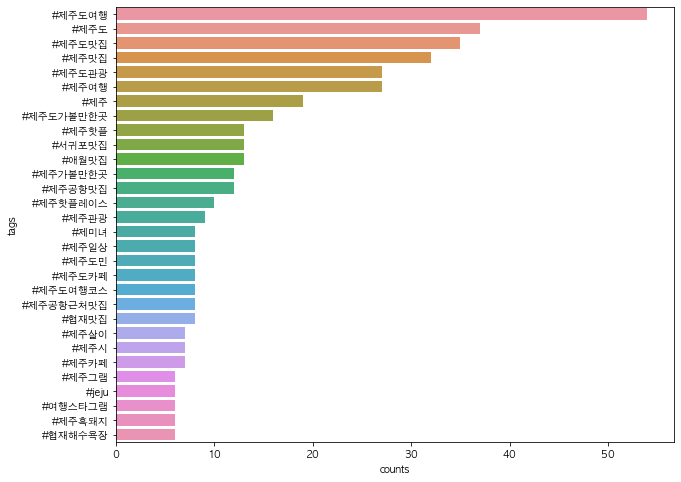

In [32]:
plt.figure(figsize = (10,8))
sns.barplot(x='counts', y='tags', data=tag_counts_df)

In [33]:
print(sys.version)

3.8.4 (v3.8.4:dfa645a65e, Jul 13 2020, 10:45:06) 
[Clang 6.0 (clang-600.0.57)]


In [34]:
!pip3 install wordcloud
from wordcloud import WordCloud
import platform

     |████████████████████████████████| 158 kB 2.8 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.


In [36]:
if platform.system() == 'Windows':
    font_path = 'c:/Windows/Fonts/malgun.ttf'
elif platform.system() == 'Darwin':
    font_path = '/Users/$USER/Library/Fonts/AppleGothic.ttf' # $USER는 '이 창을 활용하고 있는 사용자를 가져와라'는 리눅스 명령어

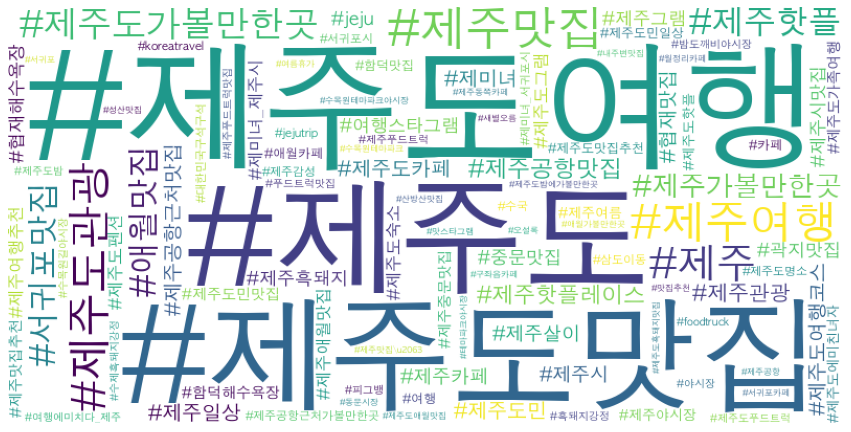

In [39]:
wordcloud = WordCloud(font_path=font_path,
                      background_color='white',
                      max_words=100,
                      relative_scaling=0.3,
                      width=800,
                      height=400
                     ).generate_from_frequencies(tag_counts_selected)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./files/2_tag-wordcloud.png')